<a href="https://colab.research.google.com/github/anapmdm/Intro-ao-Pandas/blob/main/Analise_de_Microdados_do_ENEM_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de Microdados do ENEM 2021


In [1]:
#importando pacotes
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#importando df
df_enem = pd.read_csv('/content/MICRODADOS_ENEM_2021.csv', sep=";", encoding='ISO-8859-1')
df_enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [3]:
#verificando as colunas
df_enem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [4]:
#filtrando colunas não utilizadas
#copiado colunas anteriores e atribuindo a novo df
colunas_selecionadas = ['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO']

In [5]:
#filtrando algumas colunas
df_clean_enem = df_enem.filter(items=colunas_selecionadas)
df_clean_enem.tail()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
74111,2,M,1,3,1,2,0,2,1.0,0,...,551.6,559.0,426.6,1.0,120.0,120.0,120.0,140.0,100.0,600.0
74112,11,F,3,1,1,1,13,1,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74113,3,M,1,4,1,2,0,3,1.0,0,...,645.5,584.4,693.7,1.0,140.0,120.0,100.0,120.0,100.0,580.0
74114,4,F,1,3,1,2,0,2,1.0,0,...,376.5,436.0,389.5,1.0,80.0,120.0,80.0,80.0,80.0,440.0
74115,11,F,1,1,1,1,9,1,NaN,0,...,532.3,521.8,728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#df novo com valores de uma coluna selecionada
df_cidades_enem = df_clean_enem['NO_MUNICIPIO_ESC']
df_cidades_enem

0             NaN
1             NaN
2             NaN
3           Crato
4        Redenção
           ...   
74111      Sobral
74112         NaN
74113         NaN
74114         NaN
74115         NaN
Name: NO_MUNICIPIO_ESC, Length: 74116, dtype: object

In [7]:
#verificando numero de alunos por cidade
df_cidades_enem.value_counts()

Fortaleza         1277
Rio de Janeiro     560
São Paulo          506
Belo Horizonte     354
Goiânia            343
                  ... 
Nepomuceno           1
João Neiva           1
Barra do Piraí       1
Itacaré              1
Itaguaru             1
Name: NO_MUNICIPIO_ESC, Length: 2247, dtype: int64

>**A cidade de Fortaleza apresentou o maior número de candidatos.**

**Código da Faixa Etária Correspondente**

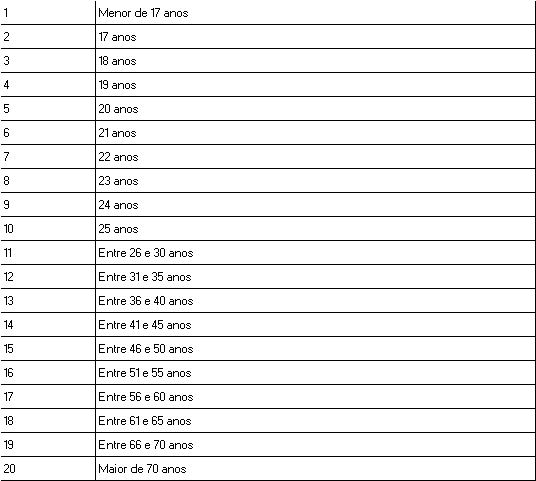

In [8]:
#verificando qtd de alunos por idade
df_idade_enem = df_clean_enem['TP_FAIXA_ETARIA']
df_idade_enem.value_counts()


3     20026
2     16963
4      9774
5      5607
1      4128
6      3494
11     3265
7      2240
12     1741
8      1606
9      1327
13     1267
10     1046
14      745
15      441
16      257
17      129
18       40
19       14
20        6
Name: TP_FAIXA_ETARIA, dtype: int64

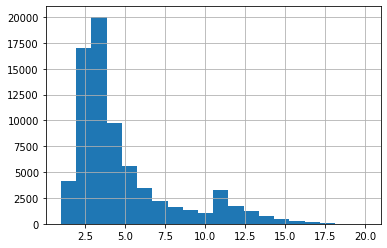

In [9]:
#plotando os valores de idade
df_idade_enem.hist(bins=20)

>**Nesta analise podemos verificar que a grande maioria possui entre 17 e 18 anos. Um dado interessante apresentado é que um bom número de pessoas com mais de 60 anos também realizaram a prova.**









---




In [10]:
#separação por estados
df_estados_enem = df_clean_enem['SG_UF_ESC']
df_estados_enem.value_counts()

CE    4192
GO    2435
SP    2056
MG    1518
BA    1287
RJ    1266
PE     920
PR     766
PA     638
MA     584
PB     534
RS     526
ES     479
PI     469
SC     453
RN     421
SE     249
MT     244
DF     244
AL     242
MS     152
TO     143
AM     113
RO      79
AP      44
AC      16
RR      14
Name: SG_UF_ESC, dtype: int64

In [11]:
#verificando o percentual de candidatos por sexo declarado
df_sexo_enem= df_clean_enem['TP_SEXO']
df_sexo_enem.value_counts()/df_sexo_enem.shape[0]

F    0.700631
M    0.299369
Name: TP_SEXO, dtype: float64

**Podemos conferir que quase 70% dos candidatos é do sexo feminino.**

---



In [12]:
#verificando dados nulos
round((df_clean_enem.isnull().sum()/df_clean_enem.shape[0]).sort_values(ascending=False),2)

CO_UF_ESC                 0.73
CO_MUNICIPIO_ESC          0.73
TP_SIT_FUNC_ESC           0.73
TP_LOCALIZACAO_ESC        0.73
TP_DEPENDENCIA_ADM_ESC    0.73
SG_UF_ESC                 0.73
NO_MUNICIPIO_ESC          0.73
TP_ENSINO                 0.56
CO_PROVA_MT               0.22
NU_NOTA_CN                0.22
CO_PROVA_CN               0.22
NU_NOTA_MT                0.22
TP_STATUS_REDACAO         0.18
NU_NOTA_COMP1             0.18
NU_NOTA_COMP2             0.18
NU_NOTA_COMP3             0.18
NU_NOTA_COMP4             0.18
NU_NOTA_COMP5             0.18
NU_NOTA_REDACAO           0.18
NU_NOTA_LC                0.18
NU_NOTA_CH                0.18
CO_PROVA_LC               0.18
CO_PROVA_CH               0.18
TP_PRESENCA_MT            0.00
TP_FAIXA_ETARIA           0.00
TP_PRESENCA_LC            0.00
TP_PRESENCA_CH            0.00
TP_PRESENCA_CN            0.00
TP_SEXO                   0.00
CO_UF_PROVA               0.00
NO_MUNICIPIO_PROVA        0.00
CO_MUNICIPIO_PROVA        0.00
IN_TREIN

**Verificando as notas de redação por estado.**









In [13]:
df_nota_estados_col =['SG_UF_ESC',
                      'NU_NOTA_REDACAO'] #aqui definindo as colunas que quero atribuir
df_notas_estados = df_enem.filter(items=df_nota_estados_col) #filtrando
df_notas_estados #verificando




,SG_UF_ESC,NU_NOTA_REDACAO
0,NaN,760.0
1,NaN,560.0
2,NaN,NaN
3,CE,780.0
4,CE,780.0
...,...,...
74111,CE,600.0
74112,NaN,NaN
74113,NaN,580.0
74114,NaN,440.0


In [14]:
#retirando valores nulos
df_notas_estados.dropna()

,SG_UF_ESC,NU_NOTA_REDACAO
3,CE,780.0
4,CE,780.0
33,BA,700.0
45,ES,640.0
51,ES,680.0
...,...,...
74099,CE,420.0
74102,BA,620.0
74106,AM,640.0
74109,RJ,920.0


In [15]:
#nota maxima de cada estado, organizado em ordem decrescente
df_notas_estados.groupby('SG_UF_ESC').max().sort_values (by='NU_NOTA_REDACAO',ascending=False)

,NU_NOTA_REDACAO
SG_UF_ESC,
MG,1000.0
MA,980.0
RJ,980.0
PI,980.0
PE,980.0
PB,980.0
AL,980.0
RS,980.0
SC,980.0


In [16]:
#descrição geral dos dados
df_notas_estados.groupby('SG_UF_ESC').describe()

NU_NOTA_REDACAO                                                      \
                    count        mean         std    min    25%    50%    75%   
SG_UF_ESC                                                                       
AC                   14.0  680.000000  189.086875  240.0  575.0  670.0  795.0   
AL                  228.0  708.421053  171.993130    0.0  580.0  720.0  860.0   
AM                  103.0  637.864078  139.295500  360.0  550.0  620.0  740.0   
AP                   42.0  665.238095  222.975861    0.0  545.0  660.0  860.0   
BA                 1134.0  659.135802  183.176717    0.0  560.0  660.0  800.0   
CE                 3414.0  586.262449  224.056382    0.0  480.0  600.0  740.0   
DF                  230.0  662.521739  174.282527    0.0  560.0  640.0  800.0   
ES                  437.0  682.929062  177.005227    0.0  580.0  680.0  820.0   
GO                 1724.0  599.535963  185.858159    0.0  500.0  600.0  700.0   
MA                  530.0  677.433962  178.748591    0.0  560.0  680.0  835.0   
MG                 1418.0  747.475317  167.122607    0.0  620.0  780.0  880.0   
MS                  132.0  678.939394  186.871624    0.0  560.0  690.0  820.0   
MT                  214.0  678.411215  191.429755    0.0  560.0  680.0  840.0   
PA                  598.0  669.096990  195.133903    0.0  560.0  680.0  820.0   
PB                  498.0  700.160643  194.966783    0.0  580.0  720.0  860.0   
PE                  845.0  686.390533  192.816156    0.0  580.0  700.0  840.0   
PI                  434.0  709.815668  173.991221    0.0  600.0  720.0  860.0   
PR                  702.0  662.991453  163.575064    0.0  560.0  660.0  780.0   
RJ                 1163.0  695.133276  176.514480    0.0  580.0  700.0  840.0   
RN                  397.0  702.871537  183.904938    0.0  580.0  720.0  860.0   
RO                   71.0  721.971831  180.891599    0.0  580.0  720.0  880.0   
RR                   13.0  661.538462  168.020145  360.0  560.0  660.0  700.0   
RS                  486.0  714.650206  159.827810    0.0  600.0  720.0  860.0   
SC                  406.0  694.827586  156.712664    0.0  600.0  680.0  820.0   
SE                  235.0  713.531915  179.940262    0.0  580.0  740.0  860.0   
SP                 1896.0  687.320675  152.841148    0.0  580.0  680.0  820.0   
TO                  125.0  633.600000  159.669012    0.0  540.0  620.0  740.0   

                   
              max  
SG_UF_ESC          
AC          960.0  
AL          980.0  
AM          940.0  
AP          940.0  
BA          980.0  
CE          980.0  
DF          980.0  
ES          980.0  
GO          980.0  
MA          980.0  
MG         1000.0  
MS          960.0  
MT          960.0  
PA          980.0  
PB          980.0  
PE          980.0  
PI          980.0  
PR          960.0  
RJ          980.0  
RN          980.0  
RO          960.0  
RR          960.0  
RS          980.0  
SC          980.0  
SE          960.0  
SP          980.0  
TO          940.0

*Verificando os dados apresentados o estado de MG possui a melhor média e nota mais alta na redação (outros estados também apresentaram nota maxima).*


---



**ANALISANDO DADOS SOCIOECONOMICOS**

In [17]:
#Selecionando as colunas de interesse
df_dados_se =['NU_INSCRICAO', 'NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002']
df_dados_se = df_enem.filter(items=df_dados_se) #filtrando
df_dados_se = df_dados_se.dropna() #retirando os dados nulos

In [18]:
#criando um dicionário
dicionarioq1q2 = {
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Completou a Pós-graduação',
    'H': 'Não sei'
    }


In [19]:
#agrupando por respostas
df_dados_se.filter(items=['Q001','NU_INSCRICAO']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,2306
B,10478
C,8254
D,6931
E,17252
F,4582
G,3176
H,5028


In [20]:
df_dados_se = df_dados_se.dropna()

In [21]:
#inserindo a coluna NO_Q001 e atrelando as respostas do dicionario ao questionario 1

df_dados_se['NO_Q001'] = [dicionarioq1q2[resposta] for resposta in df_dados_se.Q001]
df_dados_se

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001
1,210052384164,461.5,560.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...
3,210052128335,659.5,780.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...
4,210051353021,582.6,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...
8,210053417016,493.4,520.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...
9,210051128744,413.3,380.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...
...,...,...,...,...,...,...
74108,210051367059,435.5,580.0,E,E,"Completou o Ensino Médio, mas não completou a ..."
74109,210053827641,724.4,920.0,E,E,"Completou o Ensino Médio, mas não completou a ..."
74111,210052489390,426.6,600.0,E,H,"Completou o Ensino Médio, mas não completou a ..."
74113,210051088507,693.7,580.0,D,C,Completou a 8ª série/9º ano do Ensino Fundamen...


In [22]:
# atrelando as respostas do dicionario ao questionario 2
df_dados_se['NO_Q002'] = [dicionarioq1q2[resposta] for resposta in df_dados_se.Q002]
df_dados_se

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
1,210052384164,461.5,560.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
3,210052128335,659.5,780.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
4,210051353021,582.6,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
8,210053417016,493.4,520.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
9,210051128744,413.3,380.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...
...,...,...,...,...,...,...,...
74108,210051367059,435.5,580.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
74109,210053827641,724.4,920.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
74111,210052489390,426.6,600.0,E,H,"Completou o Ensino Médio, mas não completou a ...",Não sei
74113,210051088507,693.7,580.0,D,C,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou a 4ª série/5º ano, mas não completou..."


In [23]:
#verificando o numero de inscritos por escolaridade do Pai
df_dados_se.filter(items=['NO_Q001','NU_INSCRICAO']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",17252
Não completou a 4ª série/5º ano do Ensino Fundamental,10478
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",8254
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",6931
Não sei,5028
"Completou a Faculdade, mas não completou a Pós-graduação",4582
Completou a Pós-graduação,3176
Nunca estudou,2306


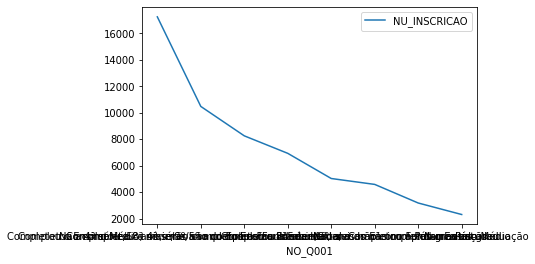

In [24]:
#Plotando as informações 
df_dados_se.filter(items=['NO_Q001','NU_INSCRICAO']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False).plot()

In [25]:
#verificando o numero de inscritos pela escolaridade da Mãe
df_dados_se.filter(items=['NO_Q002','NU_INSCRICAO']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",21484
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",7366
Não completou a 4ª série/5º ano do Ensino Fundamental,7002
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",6910
"Completou a Faculdade, mas não completou a Pós-graduação",6591
Completou a Pós-graduação,5949
Não sei,1373
Nunca estudou,1332


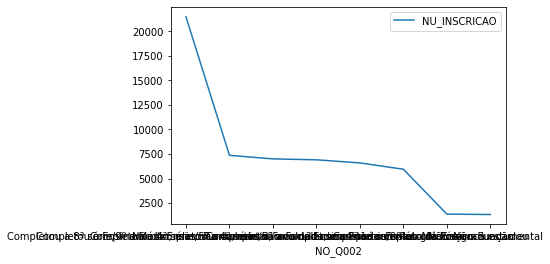

In [26]:
#Plotando as informações 
df_dados_se.filter(items=['NO_Q002','NU_INSCRICAO']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False).plot()

*Através dessa analise é possivel conferir que a maioria dos inscritos possui pais com um nivel maior de escolaridade. 
A mães apresentam maior nivel de escolaridade que os pais e o volume de inscritos que não sabe informações de escolaridade dos pais é maior que as mães.*

In [27]:
#verificando a média da nota de redação pela escolaridade da Mãe
df_dados_se.filter(items=['NO_Q001','NU_NOTA_REDACAO']).groupby('NO_Q001').mean()

,NU_NOTA_REDACAO
NO_Q001,
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",641.301187
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",662.865387
"Completou a Faculdade, mas não completou a Pós-graduação",745.006547
Completou a Pós-graduação,765.938287
"Completou o Ensino Médio, mas não completou a Faculdade",685.544864
Nunca estudou,576.938422
Não completou a 4ª série/5º ano do Ensino Fundamental,623.162817
Não sei,620.461416


In [28]:
#verificando a média da nota de redação pela escolaridade da Mãe
df_dados_se.filter(items=['NO_Q002','NU_NOTA_REDACAO']).groupby('NO_Q002').mean()

,NU_NOTA_REDACAO
NO_Q002,
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",631.528220
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",638.224274
"Completou a Faculdade, mas não completou a Pós-graduação",729.643453
Completou a Pós-graduação,745.483274
"Completou o Ensino Médio, mas não completou a Faculdade",673.767455
Nunca estudou,559.174174
Não completou a 4ª série/5º ano do Ensino Fundamental,603.627535
Não sei,571.638747


**Conclusão:**

Analisando os dados conferimos que maior parte dos inscritos são do sexo feminino e a faixa etária com maior numero de candidatos está em torno de 17 e 18 anos, um dado interessante de observar foi a quantidade de pessoas com idade acima de 60 anos.

O estado de Minas Gerais apresentou o melhor valor de média na nota de redação e a cidade com maior numero de candidatos foi Fortaleza.

As analises mostraram a importante da escolaridade dos pais refletida no número de inscritos e nas notas. 

In [29]:
#adicionando uma nova coluna ao df utilizado anteriormente 
df_dados_se['SG_UF_PROVA'] = df_enem.SG_UF_PROVA
df_dados_se. head()


,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002,SG_UF_PROVA
1,210052384164,461.5,560.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,AL
3,210052128335,659.5,780.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,CE
4,210051353021,582.6,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ...",CE
8,210053417016,493.4,520.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,MG
9,210051128744,413.3,380.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...,BA


In [30]:
# Verificando a media da nota de redação do estado do RS conforme o nivel de escolaridade da mãe

df_dados_se.filter(items=['NU_NOTA_REDACAO','NO_Q002'])\
.where(df_dados_se.SG_UF_PROVA =='RS')\
.groupby('NO_Q002')\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,772.758621
"Completou a Faculdade, mas não completou a Pós-graduação",749.268293
"Completou o Ensino Médio, mas não completou a Faculdade",699.545455
Não sei,679.230769
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",663.091787
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",654.545455
Não completou a 4ª série/5º ano do Ensino Fundamental,627.759563
Nunca estudou,600.000000


In [31]:
# Verificando a media da nota de redação do estado de MG conforme o nivel de escolaridade da mãe

df_dados_se.filter(items=['NU_NOTA_REDACAO','NO_Q002'])\
.where(df_dados_se.SG_UF_PROVA =='MG')\
.groupby('NO_Q002')\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,779.798489
"Completou a Faculdade, mas não completou a Pós-graduação",779.193758
"Completou o Ensino Médio, mas não completou a Faculdade",727.305675
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",696.158730
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",685.050215
Não completou a 4ª série/5º ano do Ensino Fundamental,644.086687
Não sei,634.000000
Nunca estudou,600.000000


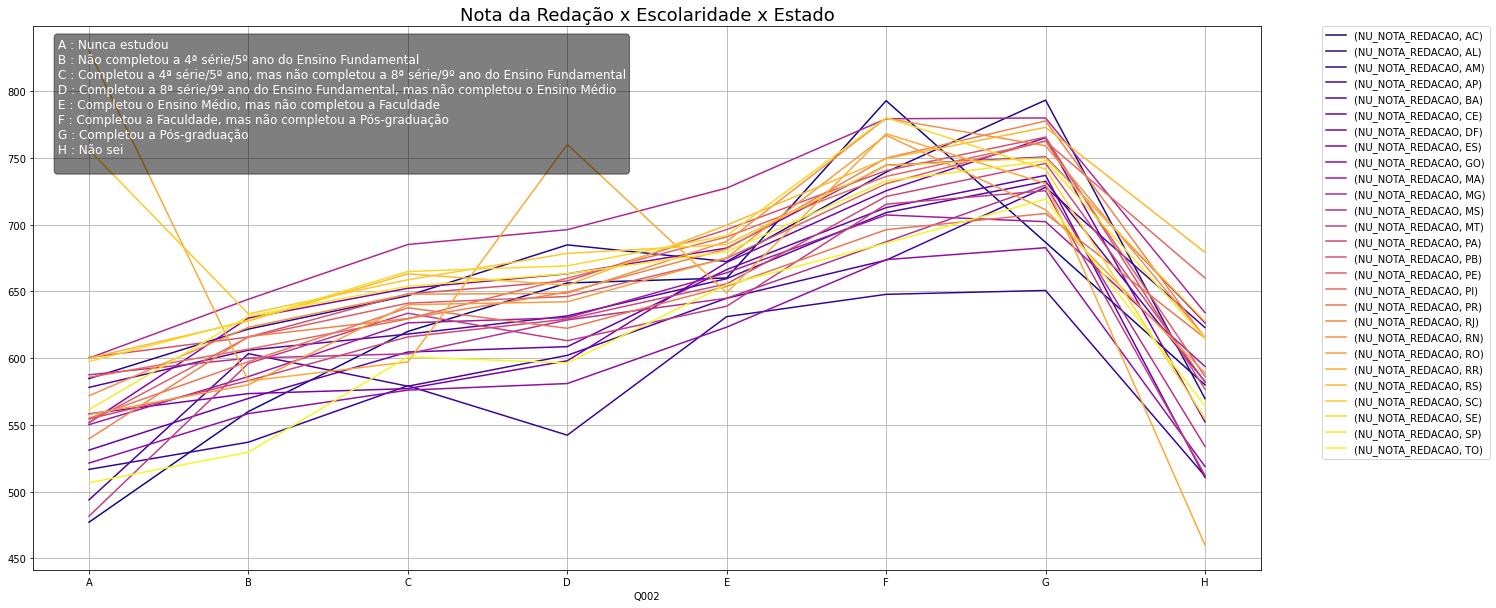

In [32]:
# Verificando a media da nota de redação por estado conforme o nivel de escolaridade da mãe

ax = df_dados_se.filter(items=['SG_UF_PROVA','Q002', 'NU_NOTA_REDACAO'])\
.groupby(['Q002', 'SG_UF_PROVA'])\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
.unstack().plot(figsize=(22,10), colormap = 'plasma', grid=True)
ax.set_title('Nota da Redação x Escolaridade x Estado', fontsize=18)

handles, labels = ax.get_legend_handles_labels()

import re
ax.legend(bbox_to_anchor = (1.05,1), loc=0, borderaxespad=0)

dicQ002 = ''
for key, value in dicionarioq1q2.items():
  dicQ002 = dicQ002 + "{k} : {v}\n".format(k=key, v=value)

ax.text(0.02,0.74, dicQ002, transform = ax.transAxes, fontsize=12,color= 'white',
        bbox={'boxstyle':'round', 'facecolor': 'black','alpha': 0.5});


**Média de notas por municipio**

In [44]:
df_enem_municipios = df_enem.filter(items= ['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 
                                            'CO_UF_ESC','NU_NOTA_CN', 'NU_NOTA_CH',
                                            'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])

In [45]:
df_enem_municipios.dropna()


,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
3,2304202.0,Crato,23.0,580.7,678.9,638.9,659.5,780.0
4,2311603.0,Redenção,23.0,497.7,532.4,457.6,582.6,780.0
33,2932606.0,Urandi,29.0,414.6,410.1,386.7,423.0,700.0
45,3203502.0,Montanha,32.0,476.8,608.5,534.2,570.2,640.0
51,3204906.0,São Mateus,32.0,433.4,622.0,548.3,579.4,680.0
...,...,...,...,...,...,...,...,...
74098,3515004.0,Embu das Artes,35.0,361.3,498.6,490.1,704.3,880.0
74099,2312908.0,Sobral,23.0,439.6,468.4,470.6,420.6,420.0
74102,2927408.0,Salvador,29.0,490.8,570.4,572.5,559.4,620.0
74109,3301009.0,Campos dos Goytacazes,33.0,610.8,612.6,648.3,724.4,920.0


In [54]:
#retirando o index e transformando em coluna
df_enem_municipios_media = df_enem_municipios.groupby(['CO_MUNICIPIO_ESC','NO_MUNICIPIO_ESC','CO_UF_ESC'], as_index=False).mean()
df_enem_municipios_media.head()

,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015.0,Alta Floresta D'Oeste,11.0,539.90,628.90,528.700,641.400,880.0
1,1100023.0,Ariquemes,11.0,411.80,581.40,537.200,446.200,880.0
2,1100049.0,Cacoal,11.0,584.30,685.40,660.900,716.200,940.0
3,1100098.0,Espigão D'Oeste,11.0,470.90,580.20,544.500,592.000,700.0
4,1100114.0,Jaru,11.0,492.95,549.15,493.725,465.475,660.0


In [47]:
df_enem_municipios_media.to_csv('mediadoenempormunicipio.csv')

**Visualização das médias de notas no mapa do Brasil**

In [48]:
df_lat_long = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv')
df_lat_long.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo


In [49]:
#unindo dfs
df_lat_long_municipios = pd.merge(df_enem_municipios_media, df_lat_long,
                                  how= 'left', left_on = ['CO_MUNICIPIO_ESC'],
                                  right_on= ['codigo_ibge'])
df_lat_long_municipios.head()

,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,1100015.0,Alta Floresta D'Oeste,11.0,539.90,628.90,528.700,641.400,880.0,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11,33,69,America/Porto_Velho
1,1100023.0,Ariquemes,11.0,411.80,581.40,537.200,446.200,880.0,1100023,Ariquemes,-9.90571,-63.0325,0,11,7,69,America/Porto_Velho
2,1100049.0,Cacoal,11.0,584.30,685.40,660.900,716.200,940.0,1100049,Cacoal,-11.43430,-61.4562,0,11,9,69,America/Porto_Velho
3,1100098.0,Espigão D'Oeste,11.0,470.90,580.20,544.500,592.000,700.0,1100098,Espigão D'Oeste,-11.52660,-61.0252,0,11,25,69,America/Porto_Velho
4,1100114.0,Jaru,11.0,492.95,549.15,493.725,465.475,660.0,1100114,Jaru,-10.43180,-62.4788,0,11,15,69,America/Porto_Velho


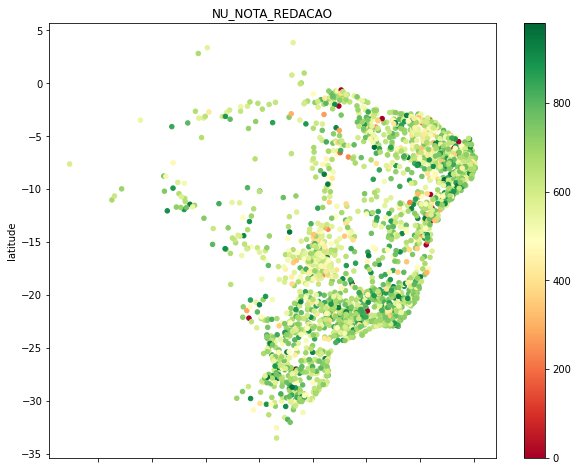

In [52]:
df_lat_long_municipios.plot.scatter(y='latitude', x='longitude',
                                    c= df_lat_long_municipios['NU_NOTA_REDACAO'],
                                    cmap='RdYlGn',
                                    figsize=(10,8), title='NU_NOTA_REDACAO')

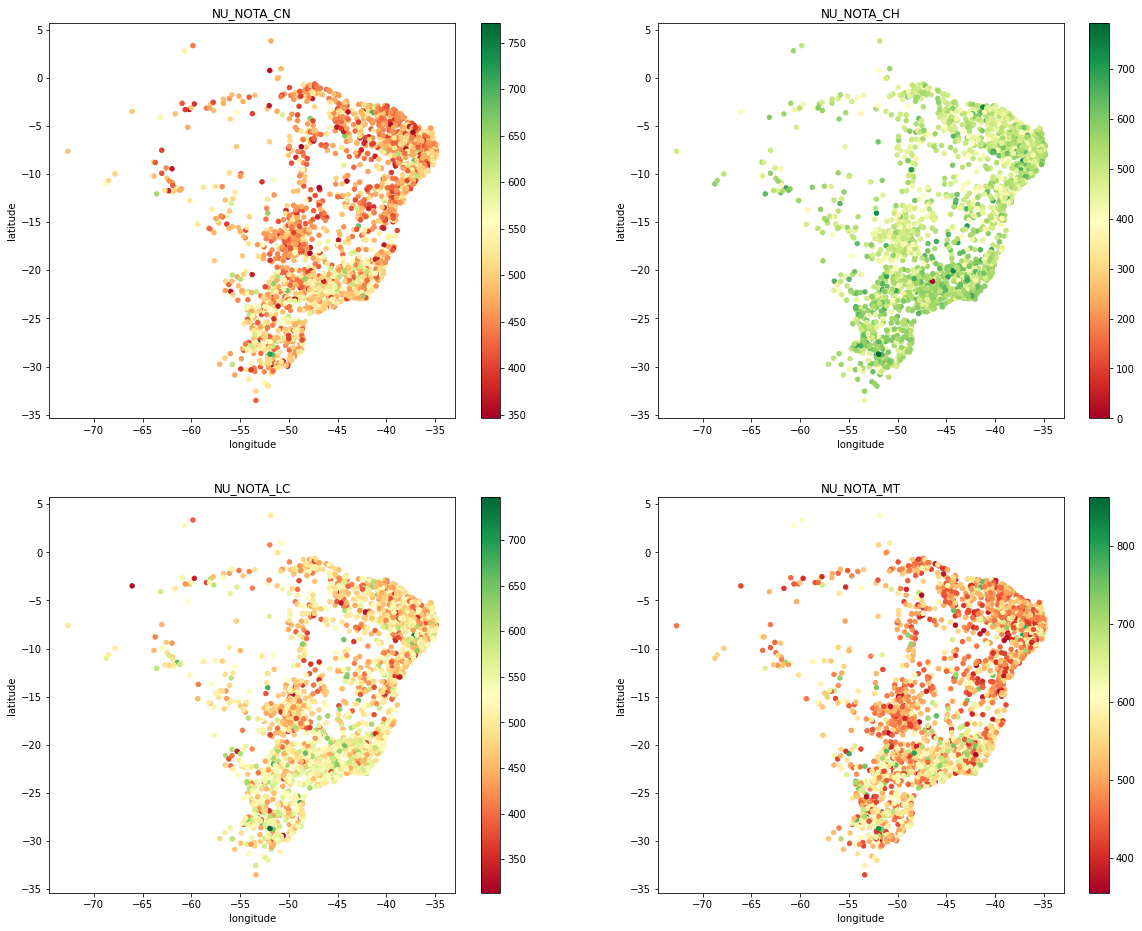

In [66]:
#Gráfico das médias das notas nacionais

fig, ax= plt.subplots (2,2, figsize = (20,16))
df_lat_long_municipios.plot.scatter(y='latitude', x='longitude',
                                    c= df_lat_long_municipios['NU_NOTA_CN'], #Média das notas de Ciências da Natureza
                                    cmap='RdYlGn',
                                    title='NU_NOTA_CN', ax=ax[0,0])

df_lat_long_municipios.plot.scatter(y='latitude', x='longitude',
                                    c= df_lat_long_municipios['NU_NOTA_CH'], #Média das notas de Ciências Humanas
                                    cmap='RdYlGn',
                                    title='NU_NOTA_CH', ax=ax[0,1])

df_lat_long_municipios.plot.scatter(y='latitude', x='longitude',
                                    c= df_lat_long_municipios['NU_NOTA_LC'], #Média das notas de Linguagens
                                    cmap='RdYlGn',
                                    title='NU_NOTA_LC', ax=ax[1,0])

df_lat_long_municipios.plot.scatter(y='latitude', x='longitude',
                                    c= df_lat_long_municipios['NU_NOTA_MT'], #Média das notas de Matemática
                                    cmap='RdYlGn',
                                    title='NU_NOTA_MT', ax=ax[1,1])
                                  
                                  

*Nas plotagens dos gráficos vemos que as notas de Ciências da Natureza e Matemática são mais baixas, no entando as médias das notas de redação são de média a alta.*